In [1]:
import tensorflow as tf
print(tf.version.VERSION)

2024-07-01 15:03:18.110132: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-01 15:03:18.110183: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-01 15:03:18.110211: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-01 15:03:18.117108: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.14.0


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import librosa
from tqdm import tqdm
import keras

In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam

In [9]:
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

In [11]:
import librosa
audio_file_path= '/home/emre/my_code_projects/Konusmaci_Tanima/archive/test/sel_test (1).wav'
#ses dosyasım dijital hale getirelim
librosa_audio_data, librosa_sample_rate=librosa.load(audio_file_path)

print(librosa_audio_data)

librosa_audio_data

/tmp/ipykernel_437500/995308183.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  librosa_audio_data, librosa_sample_rate=librosa.load(audio_file_path)


FileNotFoundError: [Errno 2] No such file or directory: '/home/emre/my_code_projects/Konusmaci_Tanima/archive/test2/sel_test (1).wav'

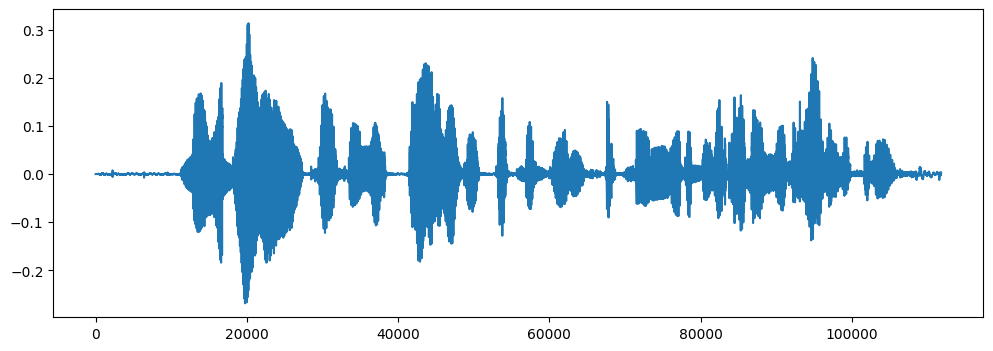

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)
plt.show()

In [ ]:
mfccs=librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)

In [ ]:
mfccs.shape

(40, 219)

In [ ]:
mfccs

array([[-6.1546802e+02, -6.0789380e+02, -5.9693414e+02, ...,
        -5.9275616e+02, -5.5444397e+02, -5.2876324e+02],
       [ 8.3659840e+00,  1.8104824e+01,  3.1066118e+01, ...,
         3.7792282e+01,  8.3198288e+01,  1.0312236e+02],
       [ 8.0548573e+00,  1.5570734e+01,  2.3231434e+01, ...,
         3.1543192e+01,  5.7851414e+01,  5.2878838e+01],
       ...,
       [ 1.9268976e+00, -4.3476731e-01, -1.1753064e+00, ...,
         4.1540062e-01, -7.7916914e-01, -3.1053662e-02],
       [ 1.9978280e+00,  5.0730771e-01, -1.8126148e+00, ...,
         1.2145913e+00, -1.5933224e+00, -1.6158004e+00],
       [ 2.1840122e+00,  2.3531241e+00,  3.9095145e-01, ...,
         3.8226657e+00, -8.9592683e-01, -3.1258127e-01]], dtype=float32)

In [12]:
audio_dataset_path="/home/emre/my_code_projects/Konusmaci_Tanima/archive/"
metadata=pd.read_csv("/home/emre/my_code_projects/Konusmaci_Tanima/archive/train3_sampled.csv")
metadata.head()

,id,file_path,speech,speaker
0,aew_a0546,train/aew/arctic_a0546.wav,I lost my balance and pitched head foremost in...,aew
1,aew_a0022,train/aew/arctic_a0022.wav,Hardly were our plans made public before we we...,aew
2,aew_b0509,train/aew/arctic_b0509.wav,He had fulfilled his duty and paid properly.,aew
3,aew_a0573,train/aew/arctic_a0573.wav,There was no law on the Yukon save what they m...,aew
4,aew_b0293,train/aew/arctic_b0293.wav,Between him and all domestic animals there mus...,aew


In [13]:
import resampy
def feature_extractor(file):

  audio,sample_rate=librosa.load(file_name,res_type="scipy")
  mfccs_features=librosa.feature.mfcc(y=audio, sr=sample_rate,n_mfcc=40)
  mfccs_scaled_features=np.mean(mfccs_features.T,axis=0)

  return mfccs_scaled_features
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
  file_name=os.path.join(os.path.abspath(audio_dataset_path),str(row["file_path"]))
  final_class_labels=row["speaker"]
  data=feature_extractor(file_name)
  extracted_features.append([data,final_class_labels])
  


6600it [06:05, 18.04it/s]


In [14]:
extracted_features_df=pd.DataFrame(extracted_features,columns=["features","speaker"])
extracted_features_df.head()

,features,speaker
0,"[-246.61261, 123.60075, -18.479763, 60.44829, ...",aew
1,"[-289.8717, 144.31097, -20.937302, 46.017338, ...",aew
2,"[-276.39493, 123.51526, -8.517353, 61.315083, ...",aew
3,"[-272.6304, 139.13957, -12.24359, 51.83748, -2...",aew
4,"[-266.07703, 124.00099, -16.066206, 56.809105,...",aew


In [15]:
x=np.array(extracted_features_df["features"].tolist())
y=np.array(extracted_features_df["speaker"].tolist())

In [16]:
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [17]:
y.shape

(6600, 20)

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=33)

In [19]:
xtrain

array([[-2.8116614e+02,  1.2840517e+02, -1.1843611e+01, ...,
        -1.0070367e+00, -9.1243112e-01,  6.3399947e-01],
       [-2.6720560e+02,  9.2993675e+01, -2.2319681e+01, ...,
        -4.8982927e-01, -2.0914192e+00,  1.5806270e+00],
       [-3.3858844e+02,  1.0873019e+02, -1.1597698e+01, ...,
         8.0051965e-01,  1.4121399e+00,  1.0587960e+00],
       ...,
       [-3.5475485e+02,  8.7956329e+01,  9.7284689e+00, ...,
         7.2597808e-01, -3.3005521e-01, -4.6578324e-01],
       [-3.6825284e+02,  1.0351742e+02, -4.0424380e+00, ...,
        -2.8537984e+00, -1.4240407e+00, -1.2327560e+00],
       [-2.7643582e+02,  1.0226147e+02, -2.3669022e+01, ...,
         2.8058479e+00,  1.3695008e+00,  4.8400879e+00]], dtype=float32)

In [20]:
num_labels=20

In [21]:
model=Sequential()
model.add(Dense(125, input_shape=(40,)))
model.add(Activation("relu"))
model.add(Dropout(0.5))
#2. gizli
model.add(Dense(250))
model.add(Activation("relu"))
model.add(Dropout(0.5))
#3. gizli
model.add(Dense(250))
model.add(Activation("relu"))
model.add(Dropout(0.5))
#4. gizli
model.add(Dense(250))
model.add(Activation("relu"))
model.add(Dropout(0.5))
#5. gizli
model.add(Dense(125))
model.add(Activation("relu"))
model.add(Dropout(0.5))
#output
model.add(Dense(num_labels))
model.add(Activation("softmax"))

2024-07-01 15:26:31.085335: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-01 15:26:31.092843: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-01 15:26:31.092891: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-01 15:26:31.095132: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-01 15:26:31.095169: I tensorflow/compile

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 125)               5125      
                                                                 
 activation (Activation)     (None, 125)               0         
                                                                 
 dropout (Dropout)           (None, 125)               0         
                                                                 
 dense_1 (Dense)             (None, 250)               31500     
                                                                 
 activation_1 (Activation)   (None, 250)               0         
                                                                 
 dropout_1 (Dropout)         (None, 250)               0         
                                                                 
 dense_2 (Dense)             (None, 250)               6

In [23]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer="adam")
epochscount=500
num_batch_size=32
model.fit(xtrain,ytrain,batch_size=num_batch_size,epochs=epochscount,validation_data=(xtest,ytest),verbose=1)
model.save_weights('weights.h5')

Epoch 1/500


2024-07-01 15:26:41.212900: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-07-01 15:26:41.927981: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7ff1b40433f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-01 15:26:41.928010: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-07-01 15:26:41.940401: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-01 15:26:41.975196: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2024-07-01 15:26:42.081601: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


145/145 [==============================] - 4s 12ms/step - loss: 11.4503 - accuracy: 0.0537 - val_loss: 2.9953 - val_accuracy: 0.0485
Epoch 2/500
145/145 [==============================] - 2s 11ms/step - loss: 3.3235 - accuracy: 0.0539 - val_loss: 2.9963 - val_accuracy: 0.0495
Epoch 3/500
145/145 [==============================] - 2s 11ms/step - loss: 3.1080 - accuracy: 0.0558 - val_loss: 2.9966 - val_accuracy: 0.0495
Epoch 4/500
145/145 [==============================] - 2s 11ms/step - loss: 3.0557 - accuracy: 0.0476 - val_loss: 2.9967 - val_accuracy: 0.0495
Epoch 5/500
145/145 [==============================] - 2s 11ms/step - loss: 3.0286 - accuracy: 0.0561 - val_loss: 2.9968 - val_accuracy: 0.0495
Epoch 6/500
145/145 [==============================] - 1s 10ms/step - loss: 3.0200 - accuracy: 0.0483 - val_loss: 2.9969 - val_accuracy: 0.0495
Epoch 7/500
145/145 [==============================] - 2s 11ms/step - loss: 3.0156 - accuracy: 0.0530 - val_loss: 2.9970 - val_accuracy: 0.0495
Epo

In [24]:
validation_test_set_accuracy=model.evaluate(xtest,ytest,verbose=0)
print(validation_test_set_accuracy[1])

0.8924242258071899


In [ ]:
filename="/home/emre/my_code_projects/yeni_ses/emr_yeni.wav"
sound_signal,sample_rate=librosa.load(filename,res_type="scipy")
mfcc_features=librosa.feature.mfcc(y=sound_signal,sr=sample_rate,n_mfcc=40)
mfccs_scaled_features=np.mean(mfcc_features.T,axis=0)

In [ ]:
mfccs_scaled_features

array([-3.2611884e+02,  1.2233685e+02,  3.8153136e+00,  3.2567230e+01,
        1.4018280e+01,  6.1879930e+00,  1.6737727e+00,  2.0857129e+00,
        6.6695089e+00,  1.1745563e+01, -1.3293344e+01, -1.1316102e+01,
        2.6248398e+00, -3.3400683e+00, -7.5141377e+00,  3.5617125e+00,
        4.5875007e-01,  8.0873275e-01,  3.1233445e-01, -1.8236262e+00,
        5.7846069e-02, -2.7853450e-01,  5.4632864e+00,  4.1947894e+00,
       -4.9655843e+00, -1.8663046e-01, -5.0709386e+00, -1.8659350e+00,
       -4.7304211e+00, -1.8402677e+00, -4.4910254e+00, -3.4474967e+00,
       -7.4133301e+00, -5.3819170e+00, -3.8998172e+00, -5.6869879e+00,
        6.7274682e-02,  1.2294786e+00,  3.0088892e+00,  3.0075552e+00],
      dtype=float32)

In [ ]:
import numpy as np

# Üç sınıf için etiketler
result_classes = ["aew", "ahw", "aup", "awb", "axb", "bdl", "clb", "eey", "emr", "fem", "gka", "jmk", "ksp", "ljm", "lnh", "rms", "rxr", "sel", "slp", "slt"]

# Model tahmini
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
result_array = model.predict(mfccs_scaled_features)

# Olasılık eşik değeri
threshold = 0.5
# En yüksek olasılığı ve indeksini bulun
max_prob = np.max(result_array[0])
result = np.argmax(result_array[0])

# Eşik değeri ile karşılaştırın ve sonucu belirleyin
if max_prob < threshold:
    result_label = "other"
elif (result_classes[result]!="emr"and result_classes[result]!="sel"):
    result_label = "other"
else:
    result_label = result_classes[result]

print(f"Sonuç etiketi: {result_label}")

# Sınıf olasılıklarını yazdır
for i, prob in enumerate(result_array[0]):
    print(f"{result_classes[i]}: {prob*100:.2f}%")

# En yüksek olasılığı ve etiketi yazdır
print(f"En yüksek olasılık: {result_classes[result]} - {max_prob*100:.2f}%")


NameError: name 'mfccs_scaled_features' is not defined

In [ ]:
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)

In [ ]:
mfccs_scaled_features.shape

(1, 40)

In [ ]:
result_array=model.predict(mfccs_scaled_features)

1/1 [==============================] - 0s 18ms/step


In [ ]:
result_array

array([[9.999994e-01, 6.518448e-07]], dtype=float32)

In [ ]:
result_classes=["emr","sel","other"]

In [ ]:
result=np.argmax(result_array[0])
result_classes[result]

'emr'

Test etme kodu

In [ ]:
import numpy as np
import librosa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from sklearn.preprocessing import LabelEncoder
import os
from tqdm import tqdm

# MFCC özelliklerini çıkarmak için fonksiyon
def feature_extractor(file):
    audio, sample_rate = librosa.load(file, res_type="scipy")
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features

# Model mimarisini oluşturma
def create_model(input_shape, num_labels):
    model = Sequential()
    model.add(Dense(125, input_shape=(input_shape,)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(250))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(250))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(250))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(125))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_labels))
    model.add(Activation('softmax'))

    return model

# Model ağırlıklarını yükleme
model = create_model(input_shape=40, num_labels=20)  # 'num_labels' verisetinize göre ayarlayın
model.load_weights('weights.h5')

# Modeli derleme (eğitimde kullanılan aynı yapılandırma ile)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Ses dosyasını işleyip tahmin etme
file_path = '/home/emre/my_code_projects/yeni_ses/other.wav'  # Tahmin etmek istediğiniz ses dosyasının yolunu verin
mfccs_features = feature_extractor(file_path)
mfccs_features = np.expand_dims(mfccs_features, axis=0)

# Model tahmini
predicted_label = model.predict(mfccs_features)

# Tahmin edilen etiketi orijinal etikete dönüştürme
your_labels = ["aew", "ahw", "aup", "awb", "axb", "bdl", "clb", "eey", "emr", "fem", "gka", "jmk", "ksp", "ljm", "lnh", "rms", "rxr", "sel", "slp", "slt"]
labelencoder = LabelEncoder()
labelencoder.fit(your_labels)

# Olasılık eşik değeri
threshold = 0.5
# En yüksek olasılığı ve indeksini bulun
max_prob = np.max(predicted_label[0])
result = np.argmax(predicted_label[0])

# Eşik değeri ile karşılaştırın ve sonucu belirleyin
if max_prob < threshold:
    result_label = "other"
else:
    result_label = your_labels[result]

print(f'Tahmin edilen konuşmacı: {result_label}')

# Sınıf olasılıklarını yazdır
for i, prob in enumerate(predicted_label[0]):
    print(f"{your_labels[i]}: {prob*100:.2f}%")

# En yüksek olasılığı ve etiketi yazdır
print(f"En yüksek olasılık: {your_labels[result]} - {max_prob*100:.2f}%")



1/1 [==============================] - 0s 108ms/step
Tahmin edilen konuşmacı: emr
aew: 0.00%
ahw: 0.01%
aup: 0.00%
awb: 0.80%
axb: 0.08%
bdl: 0.00%
clb: 2.33%
eey: 0.05%
emr: 83.54%
fem: 0.04%
gka: 0.00%
jmk: 2.72%
ksp: 0.00%
ljm: 1.34%
lnh: 0.36%
rms: 0.00%
rxr: 0.36%
sel: 6.43%
slp: 1.83%
slt: 0.12%
En yüksek olasılık: emr - 83.54%
